# Prvi domaći zadatak iz Digitalne obrade signala
## Student: Luka Stankovic 2020/0634

Sve Markdown ćelije i ćelije za kod formirati u ovom fajlu. Preimenovati ga tako da broj indeksa u imenu fajla bude odgovarajući. Napisati ime, prezime i broj indeksa u ćeliji iznad ove. Ovu ćeliju obrisati pre slanja rešenja.

Dati signal je : $ 𝑥(𝑡) = cos(2𝜋𝑓_1 𝑡) + 0,5 cos(2𝜋𝑓_2 𝑡) + 3 cos(2𝜋𝑓_3 𝑡) $ koji koristimo i modifikujemo prema potrebama zadatka.

### Prvi deo zadatka

In [73]:
SE_WIDGETS = True

def importEssentialLibs(USE_WIDGETS):
    import numpy as np
    if USE_WIDGETS:
        %matplotlib widget
    else:
        %matplotlib inline
    import matplotlib as mpl
    mpl.rc('text', usetex = True)
    mpl.rc('font', family = 'serif', size = 18)
    import matplotlib.pyplot as plt
    
    return np, mpl, plt

ZADATAK 1.1

Text(0.5, 0, '$f[Hz]$')

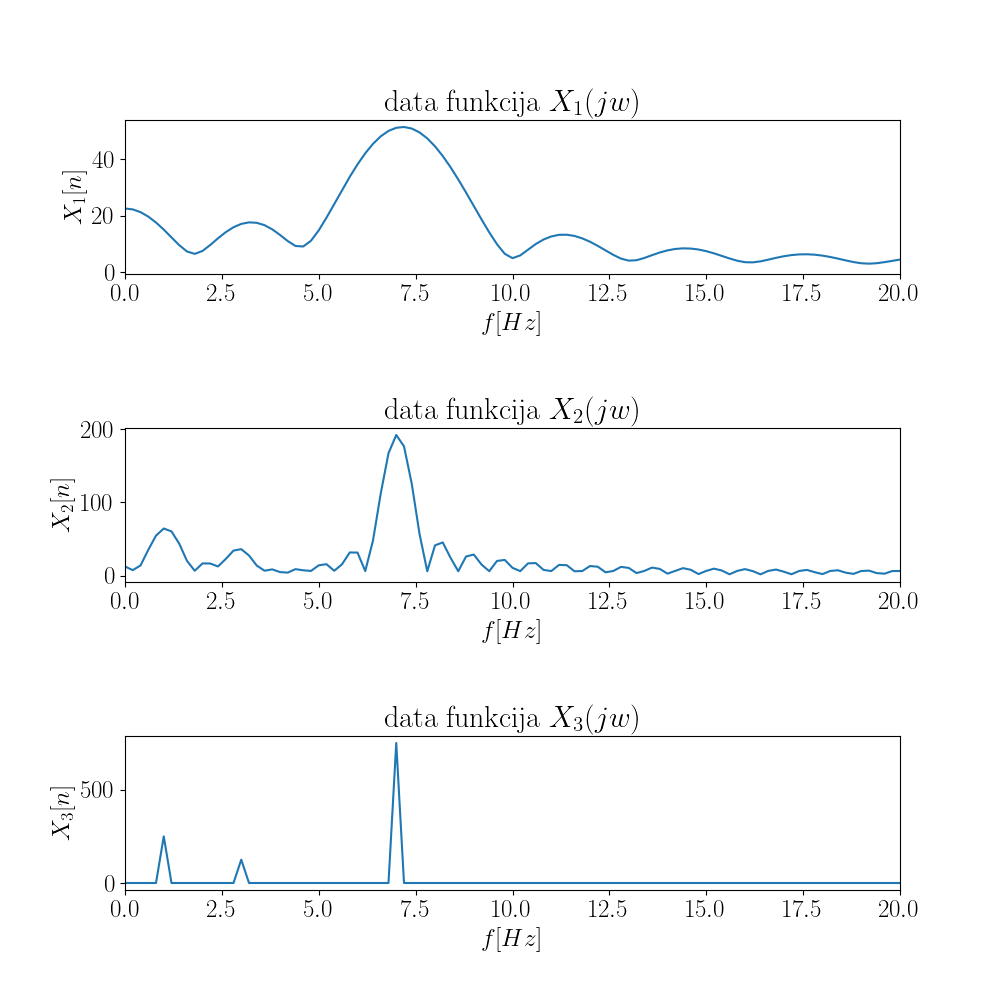

In [74]:
np, mpl, plt = importEssentialLibs(1)
from scipy.fft import fft, ifft
import scipy.fft as fft
import matplotlib.pyplot as plt
import pickle
import scipy.signal as signal
import scipy.io as sio
#F=fi/fs
#x(t)=cos(2pi*1*t) +0.5cos(2pi*3*t)+3cos(2pi*6*t) ,fs=100Hz
def fourierTransform(x, N):
    # Ova funkcija izračunava Furijeovu transformaciju u N ekvidistantnih tačaka
    if len(x) < N:
        x = np.append(x, np.zeros(N - len(x)))

    X = np.zeros(N, dtype = 'complex')
    n = np.arange(N)
    for k in range(N):
        Omega_k = 2*np.pi/N*k
        X[k] = np.sum(x*np.exp(-1j*Omega_k*n))
    
    return X

def maxFreqValue(X,NFT,fs):
    peaksPos = signal.argrelextrema(X, np.greater) 
    peaksPos = peaksPos[0]
# indeksi lokalnih maksimuma koji su najveci
# znak "-" stoji da bi se dobili indeksi u opadajucem redosledu - prvi u nizu odgovaraju maksimalnim vrednostima
    maxPeaksPos = np.argsort(-X[peaksPos]) 
# indeksi maksimalnih vrednosti u originalnom nizu u opadajucem redosledu
    maxPeakIndex = peaksPos[maxPeaksPos]
    maxPeakIndex=maxPeakIndex*(maxPeakIndex<NFT//2)
    maxPeakIndex=maxPeakIndex/NFT*fs;
    max=[]
    for i in range(6):
        if maxPeakIndex[i]!=0:
            max.append(maxPeakIndex[i])
    print(max)

def windowFunctionAndPlot(x,N,fs,NFT,i):
    
    window = signal.hamming(N, sym = False)
    X = fft.fft(x*window, NFT)
    omega=np.arange(NFT)/NFT*2*np.pi
    F=omega/(2*np.pi);
    f=fs*F;
    ax[i].plot(f,abs(X))
    ax[i].set_xlim([0, fs/4])
    ax[i].set_xlabel('$f[Hz]$')
    return X;
    
importEssentialLibs(SE_WIDGETS)
fs=100
f1=1
f2=3
f3=7
#N1=300
N1=32
N2=128
N3=1024
F1=f1/fs
F2=f2/fs
F3=f3/fs
n1=np.arange(0,N1)
x1=np.cos(2*np.pi*F1*n1)+0.5*np.cos(2*np.pi*F2*n1)+3*np.cos(2*np.pi*F3*n1)
n2=np.arange(0,N2)
x2=np.cos(2*np.pi*F1*n2)+0.5*np.cos(2*np.pi*F2*n2)+3*np.cos(2*np.pi*F3*n2)
n3=np.arange(0,N3)
x3=np.cos(2*np.pi*F1*n3)+0.5*np.cos(2*np.pi*F2*n3)+3*np.cos(2*np.pi*F3*n3)
t=np.linspace(0,2,300)
x=np.cos(2*np.pi*f1*t)+0.5*np.cos(2*np.pi*f2*t)+3*np.cos(2*np.pi*f3*t)
#plt.plot(t,x1)
fig, ax = plt.subplots(3, 1 ,figsize=(10,10))
plt.subplots_adjust(hspace = 1)
#ax[0,0].plot(t,x)
#ax[1,0].stem(n1,x1)
#ax[2,0].plot(n2,x2)
#ax[3,0].plot(n3,x3)

NFT = 500;
omega=np.arange(NFT)/NFT*2*np.pi
F=omega/(2*np.pi);
f=fs*F;
#X = fourierTransform(x, NFT)
#X=fft.fft(x,NFT)
X1=fft.fft(x1,NFT)
X2=fft.fft(x2,NFT)
X3=fft.fft(x3,NFT)
#ax[0,1].plot(f,abs(X))
ax[0].plot(f,abs(X1))
ax[0].set_xlabel('$f[Hz]$')
ax[0].set_ylabel('$X_1[n]$')
ax[0].set_xlim([0, fs/5])
ax[0].set_title('data funkcija $X_1(jw)$')
ax[1].plot(f,abs(X2))
ax[1].set_ylabel('$X_2[n]$')
ax[1].set_xlabel('$f[Hz]$')
ax[1].set_xlim([0, fs/5])
ax[1].set_title('data funkcija $X_2(jw)$')
ax[2].plot(f,abs(X3))
ax[2].set_title('data funkcija $X_3(jw)$')
ax[2].set_ylabel('$X_3[n]$')
ax[2].set_xlim([0, fs/5])
ax[2].set_xlabel('$f[Hz]$')



ZADATAK 1.2

In [75]:
maxFreqValue(abs(X1),NFT,fs)
maxFreqValue(abs(X2),NFT,fs)
maxFreqValue(abs(X3),NFT,fs)

[7.199999999999999, 3.2, 11.4]
[7.000000000000001, 1.0, 8.200000000000001]
[7.000000000000001, 1.0, 3.0]


U ovoj tački smo korišćenjem funkcije za izračunavanje indeksa maksimalnih vrednosti frekvencijskih učestanosti u originalnom nizu odredili u kojim tačkama se nalaze tri najveća maksimuma, na osnovu kojih procenjujemo učestanosti $f_1$, $f_2$ i $f_3$.
U segmentu ispod, na osnovu dobijenih rezultata, možemo izvući sledeće zaključke.

U prvom slučaju kada je $N_1 = 32$, dobijamo da su nam maksimalne učestanosti 3.2, 11.4 i 7.19 Hz, odnosno, kada pogledamo dobijeni plot za amplitudsku karakteristiku imamo samo jednu pogrešnu učestanost koja iznosi 3.27 Hz (druge dve su približno na 7 i 11 Hz). Učestanost od 1 Hz se nalazi na početku spektra i ona je zanemarena (odsečena).

Za drugi slučaj kada je $N_2 = 128$ dobijamo takođe jednu pogrešnu učestanost, od 8.2 Hz, dok su druge dve od 1 Hz i 7 Hz dobre. Pogresnu ucestanost u ovoj situaciji mozemo izbaciti ukoliko primenimo prozursku funkciju koja ima veliko slabljenje na visokim ucestanostima.

U poslednjem slučaju, za $N_3 = 1024$ dobijamo sve tačne učestanosti.



ZADATAK 1.3

Text(0.5, 0, '$f[Hz]$')

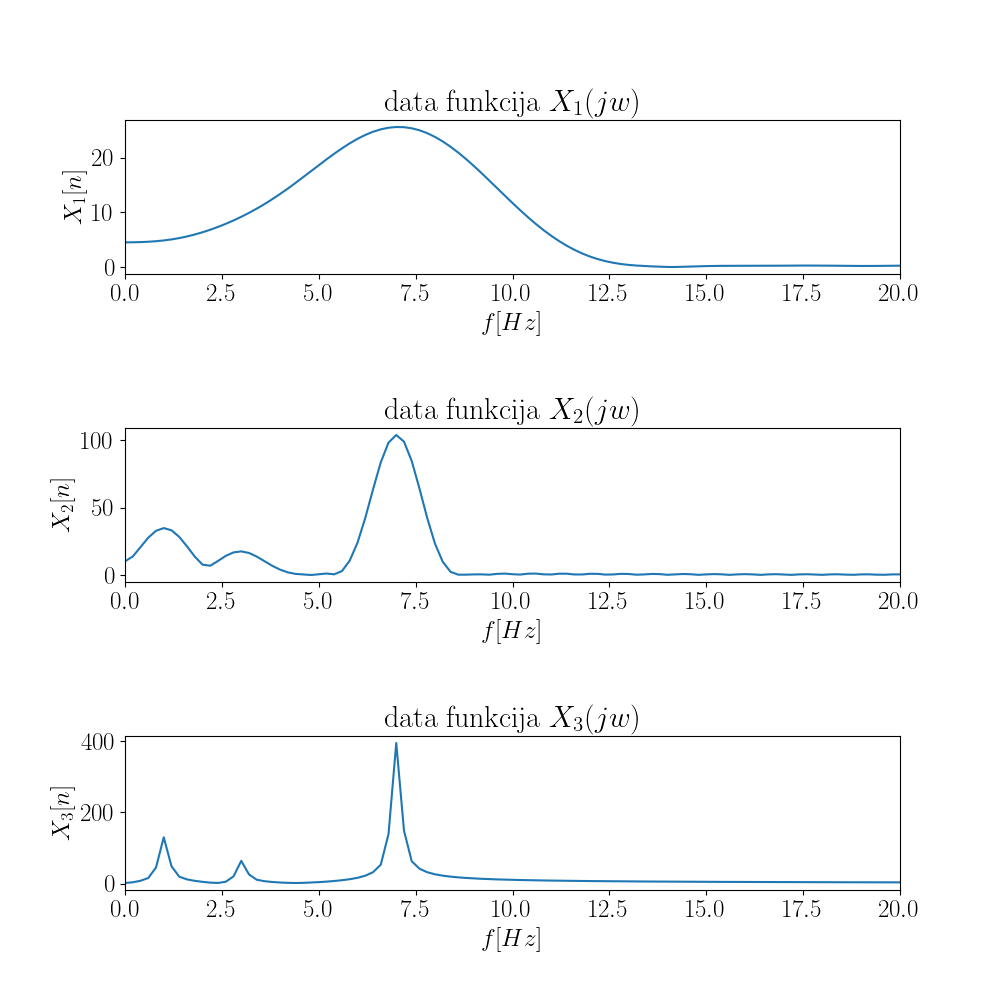

In [76]:

fig, ax = plt.subplots(3, 1 ,figsize=(10,10))
plt.subplots_adjust(hspace = 1)
X1Window=windowFunctionAndPlot(x1,N1,fs,NFT,0)
X2Window=windowFunctionAndPlot(x2,N2,fs,NFT,1)
X3Window=windowFunctionAndPlot(x3,N3,fs,NFT,2)
ax[0].set_xlabel('$f[Hz]$')
ax[0].set_ylabel('$X_1[n]$')
ax[0].set_xlim([0, fs/5])
ax[0].set_title('data funkcija $X_1(jw)$')
ax[1].set_ylabel('$X_2[n]$')
ax[1].set_xlabel('$f[Hz]$')
ax[1].set_xlim([0, fs/5])
ax[1].set_title('data funkcija $X_2(jw)$')
ax[2].set_title('data funkcija $X_3(jw)$')
ax[2].set_ylabel('$X_3[n]$')
ax[2].set_xlim([0, fs/5])
ax[2].set_xlabel('$f[Hz]$')

ZADATAK 1.4

In [77]:
maxFreqValue(abs(X1Window),NFT,fs)
maxFreqValue(abs(X2Window),NFT,fs)
maxFreqValue(abs(X3Window),NFT,fs)

[7.000000000000001, 20.599999999999998, 17.599999999999998]
[7.000000000000001, 1.0, 3.0]
[7.000000000000001, 1.0, 3.0]


Na osnovu dobijenih plotova i vrednosti za maksimalne frekvencije, možemo zaključiti da do greške dolazi samo kod prvog spektra $X_1$. Pritom se desava zbog sirenja vrha amplitudske karakteristike, kao posledica primene trougaone prozerske funckije, da se niske ucestanosti gube i funkcija koja racuna vrhove karakteristike sada vraca vrednosti koje nisu prikazane u ovom odsecenom delu spektra.


ZADATAKA 1.5

Vidimo da primenom drugih prozorski funkcija se dobijaju slicni rezultati. Prvu karakterisitku ne mozemo popraviti nijednom prozorskom funkcijom 

ZADATAK 1.6

Text(0, 0.5, '$X[k]$')

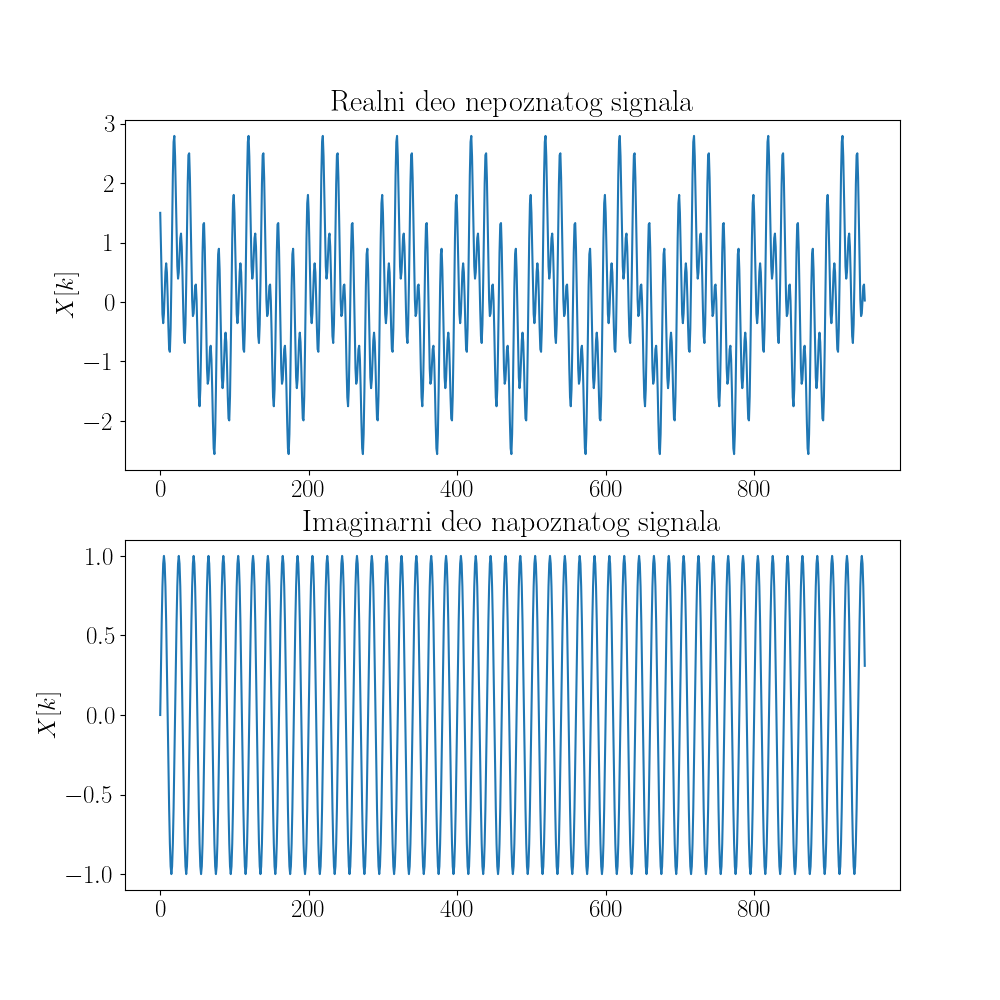

In [78]:
np, mpl, plt = importEssentialLibs(1)
import scipy.fft as fft
import ipywidgets as widgets
import IPython
from scipy.io import wavfile
import pickle
x = pickle.load(open('dz1_signali/nepoznati_signal.pkl', 'rb'))

fig, axs = plt.subplots(2, 1, figsize = [10, 10])
axs[0].plot(x.real)
axs[1].plot(x.imag)
axs[0].set_title('Realni deo nepoznatog signala')
#axs[0].set_xlabel('$f$')
axs[0].set_ylabel('$X[k]$')

axs[1].set_title('Imaginarni deo napoznatog signala')
axs[1].set_ylabel('$X[k]$')


ZADATAK 1.7

interactive(children=(IntSlider(value=480, description='i', max=950, min=10, step=10), Output()), _dom_classes…

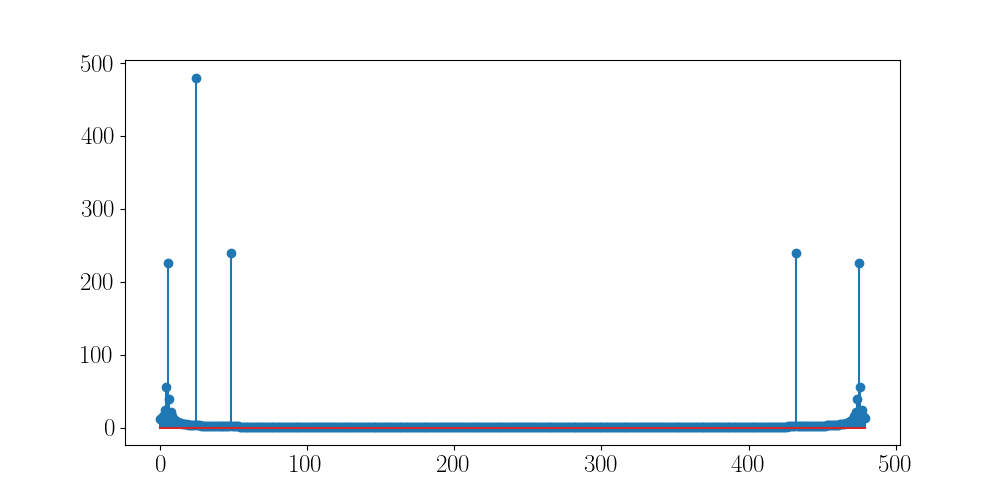

In [79]:
fig, ax = plt.subplots(1,1 ,figsize=(10,5))
plt.subplots_adjust(hspace = 1)
N=len(x)
def curenjeSpetra(i):
    plt.clf()
    X=fft.fft(x[:i])
    plt.stem(abs(X))
widgets.interact(curenjeSpetra, i=(10,N,10));

dakle 300 nek bude broj odbiraka dovoljan da se ne desi curenje spektra 

ZADATAK 1.8

Text(0, 0.5, '$arg \\{X[k]\\}$')

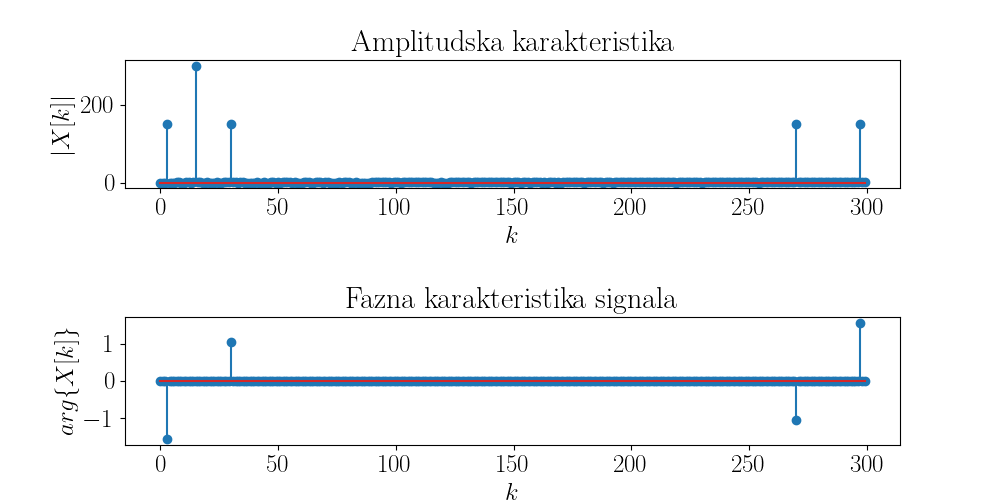

In [80]:
N=300
x=x[:N]
X=fourierTransform(x,N)
fig,ax= plt.subplots(2,1,figsize=[10,5])
plt.subplots_adjust(hspace = 1)
ax[0].stem(abs(X))
ax[0].set_title('Amplitudska karakteristika')
ax[0].set_xlabel('$k$')
ax[0].set_ylabel('$|X[k]|$')

ax[1].stem(np.angle(X) * (abs(X) > 0.1)) 
ax[1].set_title('Fazna karakteristika signala')
ax[1].set_xlabel('$k$')
ax[1].set_ylabel('$arg \{X[k]\}$')

ZADATAKA 1.9

Na osnovu dobijenih karakteristika određujemo analitički oblik signala.
Sa fazne karakteristike vidimo da za vrednosti od približno 1 i 1.5 radijana, imamo dve faze koje su približno $\frac{\pi}{3}$ i $\frac{\pi}{2}$.

Traženi signal je $\cos(\frac{2\pi}{100} n + \frac{\pi}{2})$ + $\cos(\frac{2\pi}{10} n + \frac{\pi}{3})$ + $e^{\frac{j 2\pi}{20} n}$

ZADATAK 1.10

In [81]:
USE_WIDGETS = True

def importEssentialLibs(USE_WIDGETS):
    import numpy as np
    if USE_WIDGETS:
        %matplotlib widget
    else:
        %matplotlib inline
    import matplotlib as mpl
    mpl.rc('text', usetex = True)
    mpl.rc('font', family = 'serif', size = 18)
    import matplotlib.pyplot as plt
    
    return np, mpl, plt
np, mpl, plt = importEssentialLibs(SE_WIDGETS)

import IPython.display as ipd
fs=8000
B=800
n=np.arange(0,5+1/fs,1/fs)
x=np.sin(2*np.pi*(B/2)*n*n)
ipd.Audio(x, rate=fs) 


In [82]:
xs_2=x[::2]
ipd.Audio(xs_2, rate=fs/2) 

In [83]:
xs_3=x[::5]
ipd.Audio(xs_3, rate=fs/5) 

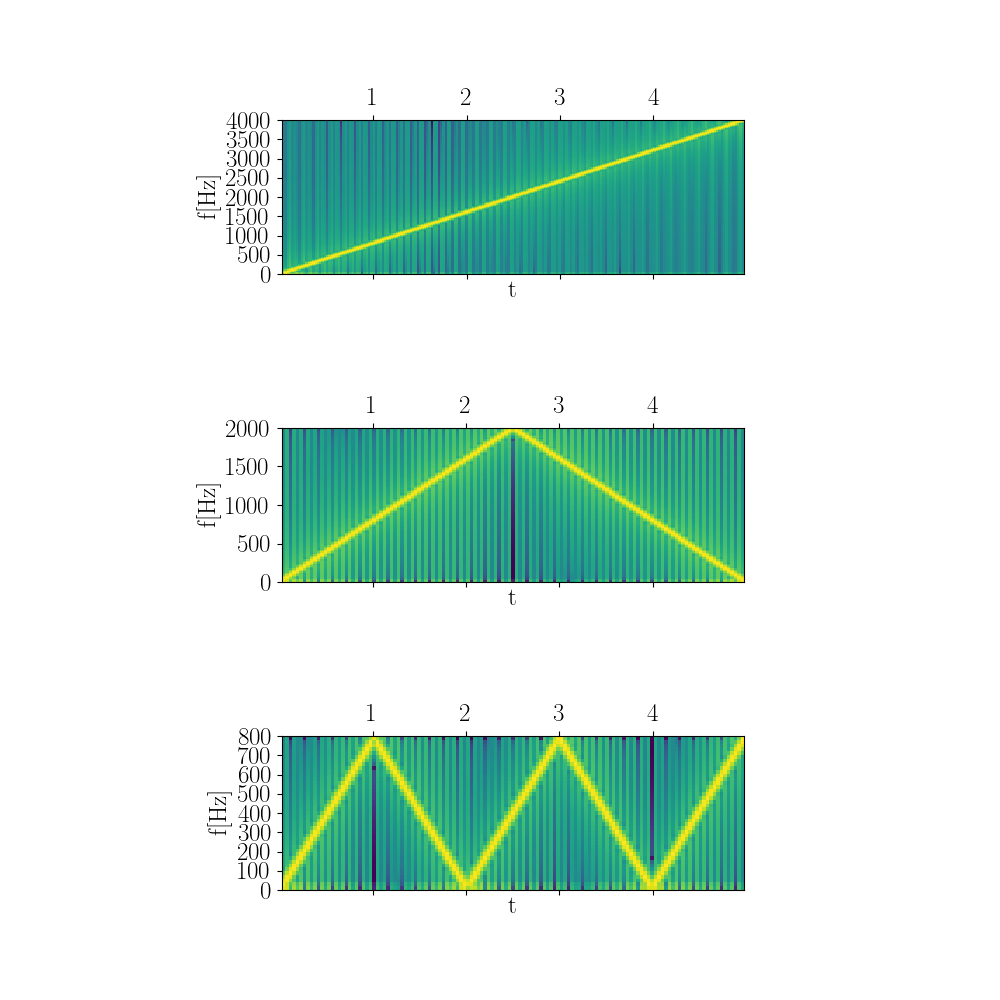

In [84]:
fMaxShow = 4000
fMaxShow1 = 2000
fMaxShow2 = 800
Nwin = len(x)//150
Nwin1 = len(xs_2)//100
Nwin2 = len(xs_3)//100
window = signal.hamming(Nwin, sym=False)
window1 = signal.hamming(Nwin1, sym=False)
window2 = signal.hamming(Nwin2, sym=False)


def forceAspect(ax, aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)


fig,ax= plt.subplots(3,1,figsize=[10,10])
plt.subplots_adjust(hspace = 1)
f, t, Sxx = signal.spectrogram(x, fs = fs, window=window, noverlap=Nwin//4, nfft=Nwin, return_onesided=True, 
                               scaling='spectrum', mode='complex')
#fMaxIndex = Nwin*fMaxShow//fs

# Za crtanje spektrograma koristimo pclormesh ili matshow u kombinaciji sa forceAspect, treba otkomentarisati jednu od sledeće tri opcije

#axs[1].pcolormesh(t, f[:fMaxIndex], 20*np.log10(abs(Sxx[:][:fMaxIndex])), shading = 'nearest')# try shading='gouraud')
fMaxIndex = Nwin*fMaxShow//fs
ax[0].matshow(20*np.log10(abs(Sxx[:fMaxIndex][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
forceAspect(ax[0], 3)

# Dodatno, možemo obrnuti smer y ose ako u vektoru extent zamenimo učestanosti i parametru origin ne postavimo vrednost na 'lower'
#axs[1].matshow(20*np.log10(abs(Sxx[:][:fMaxIndex])), extent=[min(t), max(t), fMaxShow, min(f)])
#forceAspect(axs[1], 3)

# Obeležavanje osa
ax[0].set_ylabel('f[Hz]')
ax[0].set_xlabel('t');

f, t, Sxx = signal.spectrogram(xs_2, fs = fs/2, window=window1, noverlap=Nwin1//4, nfft=Nwin1, return_onesided=True, 
                               scaling='spectrum', mode='complex')
#fMaxIndex = NFFT*fMaxShow//fs

# Za crtanje spektrograma koristimo pclormesh ili matshow u kombinaciji sa forceAspect, treba otkomentarisati jednu od sledeće tri opcije

#axs[1].pcolormesh(t, f[:fMaxIndex], 20*np.log10(abs(Sxx[:][:fMaxIndex])), shading = 'nearest')# try shading='gouraud')
fMaxIndex = 2*Nwin1*fMaxShow//fs
ax[1].matshow(20*np.log10(abs(Sxx[:fMaxIndex][:])), extent=[min(t), max(t), min(f), fMaxShow1], origin='lower')
forceAspect(ax[1], 3)

# Dodatno, možemo obrnuti smer y ose ako u vektoru extent zamenimo učestanosti i parametru origin ne postavimo vrednost na 'lower'
#axs[1].matshow(20*np.log10(abs(Sxx[:][:fMaxIndex])), extent=[min(t), max(t), fMaxShow, min(f)])
#forceAspect(axs[1], 3)

# Obeležavanje osa
ax[1].set_ylabel('f[Hz]')
ax[1].set_xlabel('t');

f, t, Sxx = signal.spectrogram(xs_3, fs = fs/5, window=window2, noverlap=Nwin2//4, nfft=Nwin2, return_onesided=True, 
                               scaling='spectrum', mode='complex')
#fMaxIndex = NFFT*fMaxShow//fs

# Za crtanje spektrograma koristimo pclormesh ili matshow u kombinaciji sa forceAspect, treba otkomentarisati jednu od sledeće tri opcije

#axs[1].pcolormesh(t, f[:fMaxIndex], 20*np.log10(abs(Sxx[:][:fMaxIndex])), shading = 'nearest')# try shading='gouraud')
fMaxIndex = 5*Nwin2*fMaxShow//fs
ax[2].matshow(20*np.log10(abs(Sxx[:fMaxIndex][:])), extent=[min(t), max(t), min(f), fMaxShow2], origin='lower')
forceAspect(ax[2], 3)

# Dodatno, možemo obrnuti smer y ose ako u vektoru extent zamenimo učestanosti i parametru origin ne postavimo vrednost na 'lower'
#axs[1].matshow(20*np.log10(abs(Sxx[:][:fMaxIndex])), extent=[min(t), max(t), fMaxShow, min(f)])
#forceAspect(axs[1], 3)

# Obeležavanje osa
ax[2].set_ylabel('f[Hz]')
ax[2].set_xlabel('t');

### Drugi deo zadatka

ZADATAK 2.1

In [85]:
def importEssentialLibs(USE_WIDGETS):
    import numpy as np
    if USE_WIDGETS:
        %matplotlib widget
    else:
        %matplotlib inline
    import matplotlib as mpl
    mpl.rc('text', usetex = True)
    mpl.rc('font', family = 'serif', size = 18)
    import matplotlib.pyplot as plt
    import scipy.signal as signal
    
    return np, mpl, plt, signal

np, mpl, plt, signal = importEssentialLibs(USE_WIDGETS)
import scipy.fft as fft
def dosSpectrogram(x, fs, window, noverlap, nfft,fMaxShow):
        x_length=len(x)
        window_length=len(window)-noverlap
        number_of_blocks=x_length//window_length
        #print(number_of_blocks)
        #print(window_length)
        #print(noverlap)
       # print(len(x[((number_of_blocks-1)*window_length):]))
        if(x_length%window_length!=0):
            #print('tata')
            y=np.zeros([nfft,number_of_blocks+1])
            for i in range(0,number_of_blocks-1):
            #if(i!=0):
                #print(len(x[(i*window_length):(i+1)*window_length+noverlap]))
            #print(i)
                y[:,i]=fft.fft(x[((i)*window_length):(i+1)*window_length+noverlap]*window,nfft)
            #else:
              #  y[:,i]=fft.fft(x[(i)*window_length:(i+1)*window_length+noverlap]*window,nfft)
                
            rest=np.concatenate((x[((number_of_blocks)*window_length):],np.zeros(window_length+noverlap-len(x[(number_of_blocks)*window_length:]))),axis=None)
            y[:,(number_of_blocks)]=fft.fft(rest*window,nfft)
            y[:,(number_of_blocks-1)]=fft.fft(x[(number_of_blocks-2)*window_length:(number_of_blocks-1)*window_length+noverlap]*window,nfft)
            #y[:,(number_of_blocks-1)]=fft.fft(rest*window,nfft)
            
        else:
            y=np.zeros([nfft,number_of_blocks])
            xp=np.concatenate((x,np.zeros(noverlap)),axis=None)
            for i in range(0,number_of_blocks):
                #if(i!=0):
                #print(len(xp[(i*window_length):(i+1)*window_length+noverlap]))
                #print(i)
                y[:,i]=fft.fft(xp[(i*window_length):(i+1)*window_length+noverlap]*window,nfft)
                #else:
                  #  y[:,i]=fft.fft(x[(i)*window_length:(i+1)*window_length+noverlap]*window,nfft)
            #rest=np.concatenate((x[((number_of_blocks)*window_length):],np.zeros(window_length+noverlap-len(x[(number_of_blocks)*window_length:]))),axis=None)
           # y[:,(number_of_blocks)]=fft.fft(rest*window,nfft)
        
        m=np.arange(x_length)/fs
        t=m[::window_length]
        fMaxIndex = (nfft*fMaxShow)//fs
        
        if any(np.iscomplex(x)):
            for i in range(len(np.tronspose(y))):
                y[:,i]=fft.fftshift(y[:,i])   
            k = np.arange(nfft) - nfft//2
            f = fs*k/nfft
            y=y[(nfft//2-fMaxIndex):(nfft//2+fMaxIndex)][:]
        else:                   
            k = np.arange(nfft)
            f = fs*k/nfft                   
            y=y[:fMaxIndex][:]
        
        return y,f,t

    

ZADATAK 2.2

/tmp/ipykernel_2629/714113574.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  y[:,i]=fft.fft(x[((i)*window_length):(i+1)*window_length+noverlap]*window,nfft)
/tmp/ipykernel_2629/714113574.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  y[:,(number_of_blocks)]=fft.fft(rest*window,nfft)
/tmp/ipykernel_2629/714113574.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  y[:,(number_of_blocks-1)]=fft.fft(x[(number_of_blocks-2)*window_length:(number_of_blocks-1)*window_length+noverlap]*window,nfft)
/tmp/ipykernel_2629/2450265991.py:21: RuntimeWarning: divide by zero encountered in log10
  ax[1].matshow(20*np.log10(abs(S[:][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
/tmp/ipykernel_2629/2450265991.py:32: RuntimeWarning: divide by zero encountered in log10
  ax[2].matshow(20*np.log10(abs(Sxx[:fMaxIndex][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')


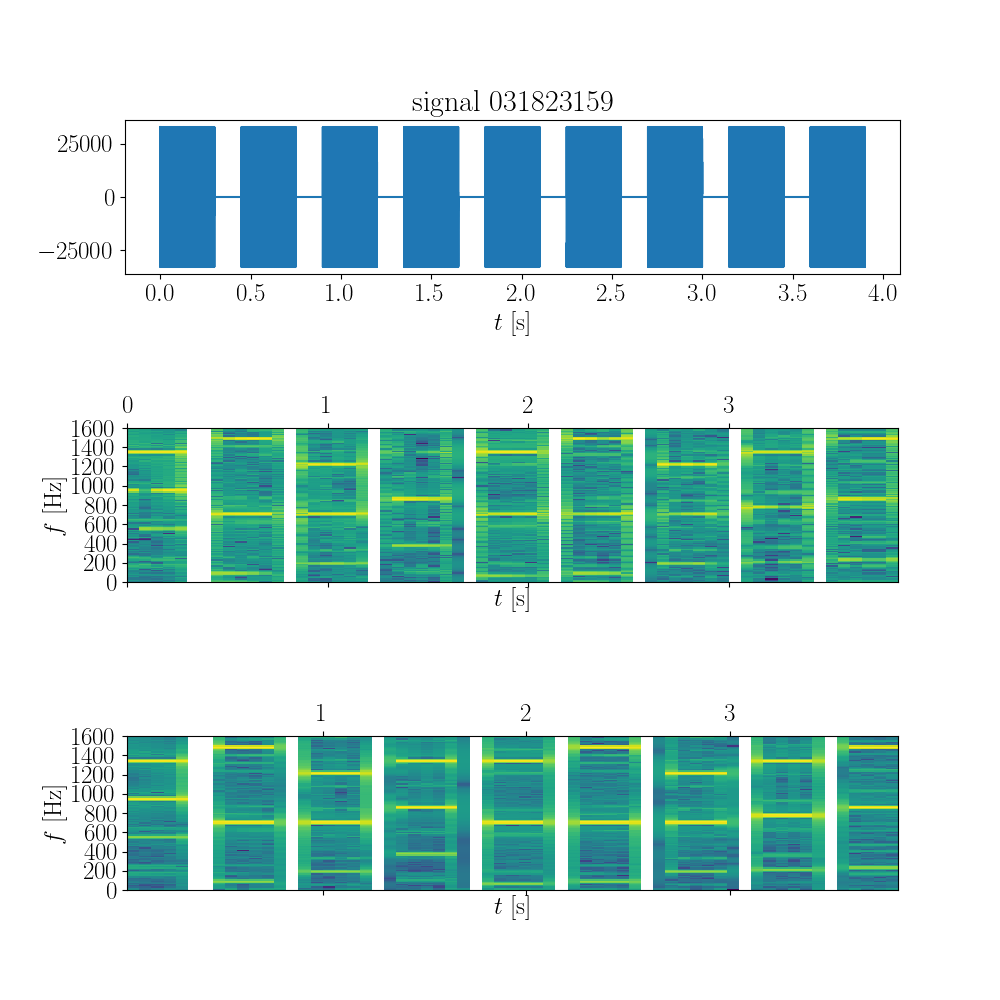

In [86]:
fs, numbers = wavfile.read("dz1_signali/031823159.wav")
fig,ax=plt.subplots(3,1,figsize=[10,10]);
plt.subplots_adjust(hspace = 1)
#print(len(numbers),fs)
time=np.arange(len(numbers))/fs;
fMaxShow = 1600
Nwin = len(numbers)//48
window = signal.hamming(Nwin, sym=False)
ax[0].plot(time,numbers)
ax[0].set_xlabel('$t$ [s]')
ax[0].set_title('signal 031823159')
ax[1].set_xlabel('$t$ [s]')
ax[1].set_ylabel('$f$ [Hz]')
ax[2].set_ylabel('$f$ [Hz]')
ax[2].set_xlabel('$t$ [s]')
#ax[0].set_ylabel('$f$ [Hz]');

#ax[1].set_xlabel('$t$ [s]')
S, f, t = dosSpectrogram(numbers, fs, window, Nwin//4, Nwin,fMaxShow)

ax[1].matshow(20*np.log10(abs(S[:][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
forceAspect(ax[1], 5)

f, t, Sxx = signal.spectrogram(numbers, fs = fs, window=window, noverlap=Nwin//4, nfft=Nwin, return_onesided=True, 
                               scaling='spectrum', mode='complex')
fMaxIndex = Nwin*fMaxShow//fs

# Za crtanje spektrograma koristimo pclormesh ili matshow u kombinaciji sa forceAspect, treba otkomentarisati jednu od sledeće tri opcije

#axs[1].pcolormesh(t, f[:fMaxIndex], 20*np.log10(abs(Sxx[:][:fMaxIndex])), shading = 'nearest')# try shading='gouraud')

ax[2].matshow(20*np.log10(abs(Sxx[:fMaxIndex][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
forceAspect(ax[2], 5)

ZADATAK 2.3

/tmp/ipykernel_2629/714113574.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  y[:,i]=fft.fft(xp[(i*window_length):(i+1)*window_length+noverlap]*window,nfft)
/tmp/ipykernel_2629/2522789890.py:33: RuntimeWarning: divide by zero encountered in log10
  ax[0].matshow(20*np.log10(abs(S[:][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
/tmp/ipykernel_2629/2522789890.py:46: RuntimeWarning: divide by zero encountered in log10
  ax[2].matshow(20*np.log10(abs(S[:][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')


Text(0, 0.5, '$f$ [Hz]')

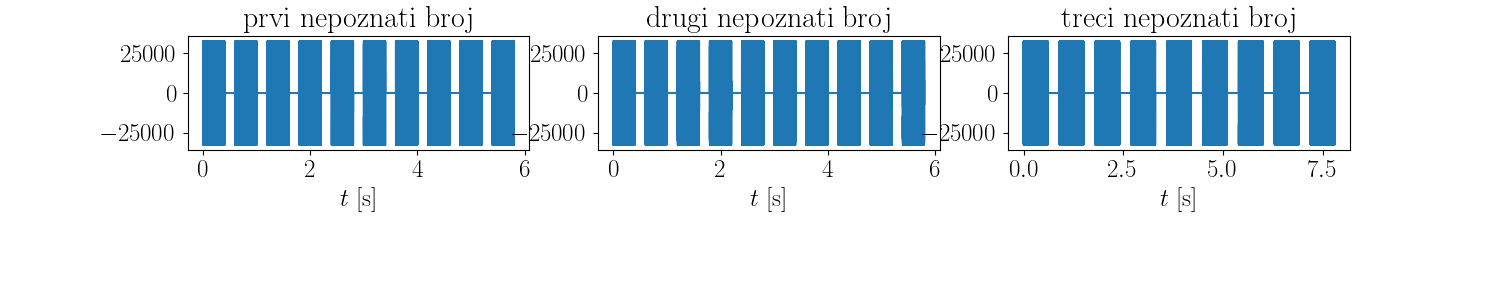

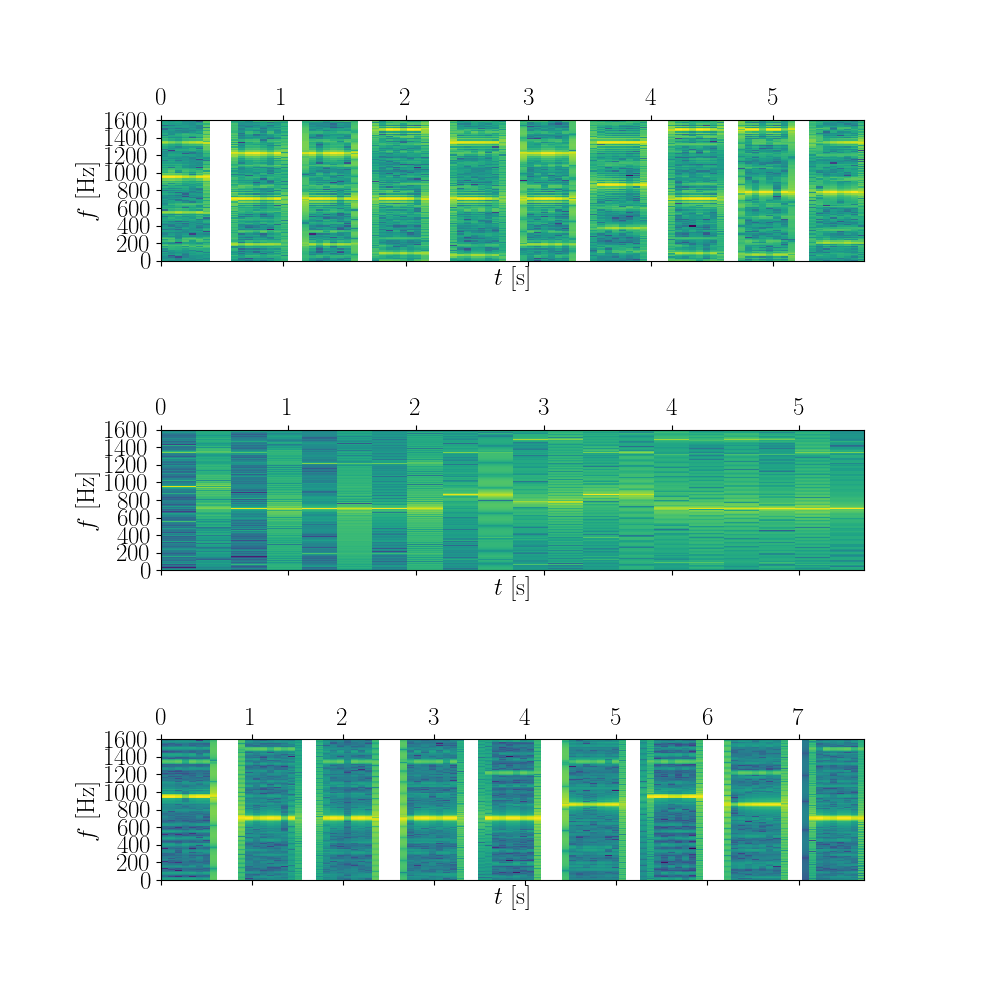

In [87]:
fs1, broj1 = wavfile.read("dz1_signali/nepoznati_broj_1.wav")
fs2, broj2 = wavfile.read("dz1_signali/nepoznati_broj_2.wav")
fs3, broj3 = wavfile.read("dz1_signali/nepoznati_broj_3.wav")
fMaxShow = 1600
Nwin = len(broj1)//75
Nwin1= len(broj2)//15
Nwin2= len(broj3)//75
window = signal.bartlett(Nwin, sym=False)
window1 = signal.blackman(Nwin1, sym=False)
window2 = signal.blackman(Nwin2, sym=False)
fig,ax=plt.subplots(1,3,figsize=[15,3]);
plt.subplots_adjust(bottom=0.5,hspace = 1.2)
#print(len(numbers),fs)
time1=np.arange(len(broj1))/fs1;
time2=np.arange(len(broj2))/fs2;
time3=np.arange(len(broj3))/fs3;

ax[0].plot(time1,broj1)
ax[0].set_xlabel('$t$ [s]')
ax[0].set_title('prvi nepoznati broj')

ax[1].plot(time2,broj2)
ax[1].set_xlabel('$t$ [s]')
ax[1].set_title('drugi nepoznati broj')

ax[2].plot(time3,broj3)
ax[2].set_xlabel('$t$ [s]')
ax[2].set_title('treci nepoznati broj')

fig,ax=plt.subplots(3,1,figsize=[10,10]);
plt.subplots_adjust(bottom=0.12,hspace = 1.2)
S, f, t = dosSpectrogram(broj1, fs1, window, Nwin//4, Nwin,fMaxShow)
ax[0].matshow(20*np.log10(abs(S[:][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
forceAspect(ax[0], 5)
ax[0].set_xlabel('$t$ [s]')
ax[0].set_ylabel('$f$ [Hz]')

S, f, t = dosSpectrogram(broj2, fs2, window1, Nwin1//4, Nwin1,fMaxShow)
ax[1].matshow(20*np.log10(abs(S[:][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
forceAspect(ax[1], 5)
ax[1].set_xlabel('$t$ [s]')
ax[1].set_ylabel('$f$ [Hz]')

S, f, t = dosSpectrogram(broj3, fs, window2, Nwin2//4, Nwin2,fMaxShow)

ax[2].matshow(20*np.log10(abs(S[:][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
forceAspect(ax[2], 5)
ax[2].set_xlabel('$t$ [s]')
ax[2].set_ylabel('$f$ [Hz]')

Sa spektrograma se moze uociti da su nepoznati brojevi zapravo : 
    nepoznat_broj_1= $0113218365$,
    nepoznat_broj_2= $0211868332$,
    nepoznat_broj_3= $032218073$
    

### Treci deo zadatka

In [90]:
def importEssentialLibs(USE_WIDGETS):
    import numpy as np
    if USE_WIDGETS:
        %matplotlib widget
    else:
        %matplotlib inline
    import matplotlib as mpl
    mpl.rc('text', usetex = True)
    mpl.rc('font', family = 'serif', size = 18)
    import matplotlib.pyplot as plt
    
    return np, mpl, plt

import IPython.display as ipd
np, mpl, plt= importEssentialLibs(1)
import scipy.fft as fft
import IPython
from scipy.io import wavfile


fs, birds_airplane = wavfile.read("dz1_signali/birds_airplane.wav")
#print(fs)
#fig=plt.figure();
#plt.plot(fft.fft(birds_airplane,len(birds_airplane)))
ipd.Audio(birds_airplane, rate=fs) 

<StemContainer object of 3 artists>

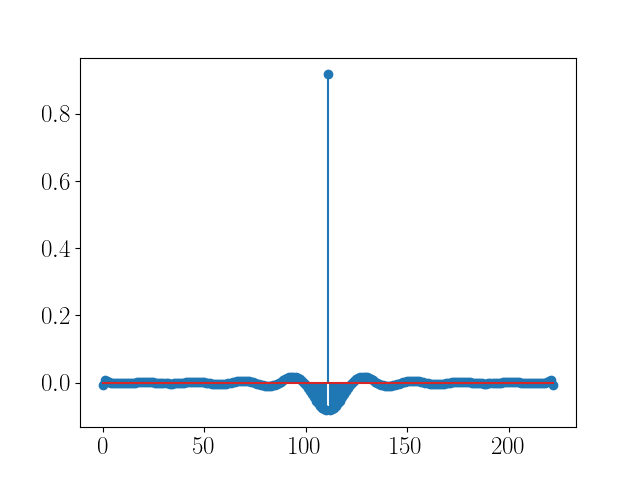

In [91]:
impulse_response_birds = pickle.load(open('dz1_signali/impulse_response_birds.pkl', 'rb'))
fig = plt.figure()
plt.stem(impulse_response_birds)

 ZADATAK 3.1 I 3.2  I  3.3

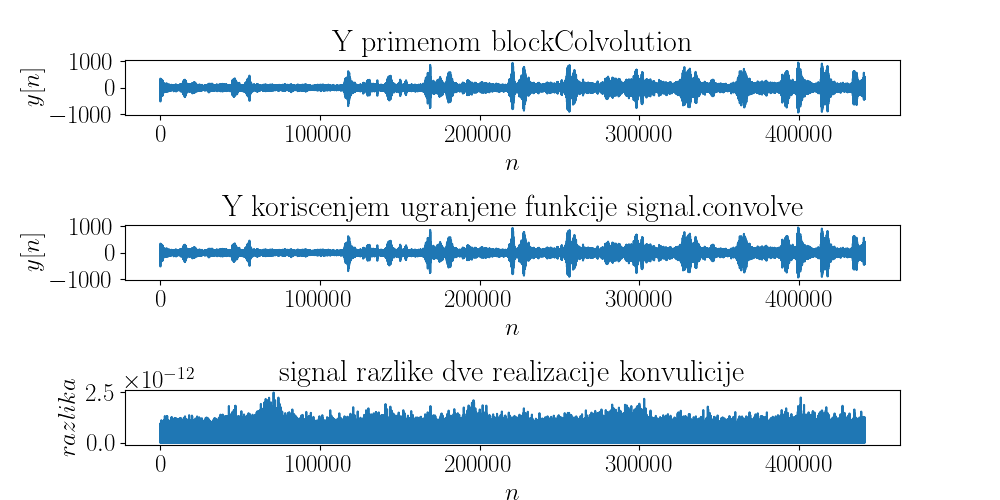

In [92]:

USE_WIDGETS = True

def importEssentialLibs(USE_WIDGETS):
    import numpy as np
    if USE_WIDGETS:
        %matplotlib widget
    else:
        %matplotlib inline
    import matplotlib as mpl
    mpl.rc('text', usetex = True)
    mpl.rc('font', family = 'serif', size = 18)
    import matplotlib.pyplot as plt
    import scipy.signal as signal
    
    return np, mpl, plt, signal

np, mpl, plt, signal = importEssentialLibs(USE_WIDGETS)

def blockConvolution(x, h, blockLength):
    Nx=len(x)
    Nh=len(h)
    Ny=Nx+Nh-1;
    y=np.zeros(Ny)
    for i in range(1,Nx//blockLength+1):
        xi=np.zeros(blockLength+Nh-1)
        xi=fft.ifft(fft.fft(x[(i-1)*(blockLength):i*(blockLength)], blockLength+Nh-1)*fft.fft(h, blockLength+Nh-1)).real
        y[(i-1)*(blockLength):(i*blockLength+Nh-1)]=y[(i-1)*(blockLength):(i*blockLength+Nh-1)]+xi
    if  Nx%blockLength!=0:
        rest=Nx-(Nx//blockLength)*blockLength
        m=x[(Nx//blockLength)*blockLength:]
        y[(Nx//blockLength)*blockLength:]=fft.ifft(fft.fft(m, rest+Nh-1)*fft.fft(h, rest+Nh-1)).real
        
    return y

blockLength=1000
y=blockConvolution(birds_airplane,impulse_response_birds,blockLength);
y1=signal.fftconvolve(birds_airplane,impulse_response_birds)
fig,ax= plt.subplots(3,1,figsize=[10,5])
plt.subplots_adjust(hspace = 2)
ax[0].plot(y)
ax[0].set_title('Y primenom blockColvolution')
ax[0].set_ylabel('$y[n]$')
ax[0].set_xlabel('$n$')
#ax[3].plot(fft.fft(birds_airplane,2000))
ax[1].plot(y1) 
ax[1].set_title('Y koriscenjem ugranjene funkcije signal.convolve')
ax[1].set_xlabel('$n$')
ax[1].set_ylabel('$y[n]$')
ax[2].plot(abs(y-y1))
ax[2].set_title('signal razlike dve realizacije konvulicije')
ax[2].set_ylabel('$razlika$')
ax[2].set_xlabel('$n$')
ipd.Audio(y, rate=fs) 

In [ ]:
def forceAspect(ax, aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

ZADATAK 3.4

Text(0.5, 0, '$t$ [s]')

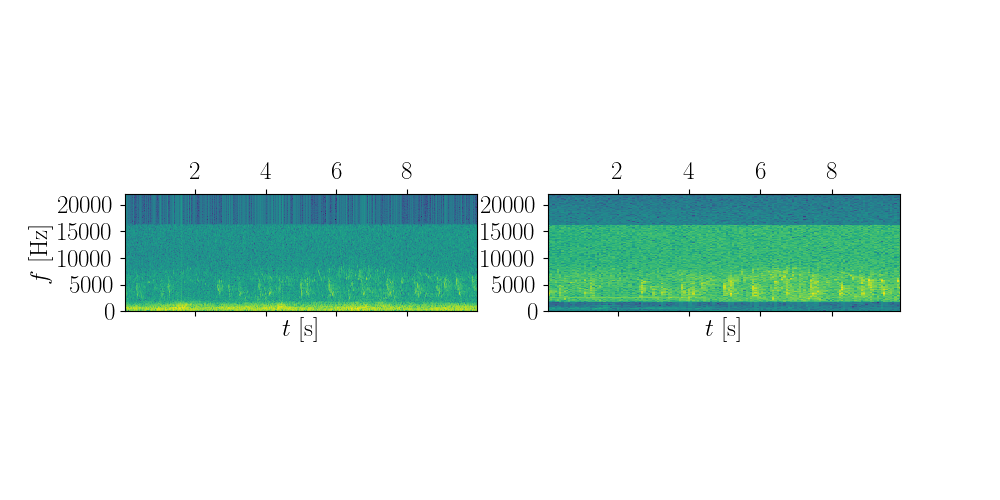

In [70]:
np, mpl, plt, signal = importEssentialLibs(USE_WIDGETS)
import scipy.fft as fft
import IPython
from scipy.io import wavfile

#fs, x = wavfile.read("audio/skala.wav")
#IPython.display.display(IPython.display.Audio(x, rate = fs))

t = np.arange(len(x))/fs
#fig, axs = plt.subplots(2, 1, figsize = [10,10], sharex=True)
#plt.subplots_adjust(bottom=0.25, hspace = 0.4)

#axs[0].plot(t, x)
#axs[0].set_xlabel('$t$ [s]')
#axs[0].set_ylabel('$x(t)$')
#axs[0].set_xlim([0, max(t)])

fMaxShow = fs//2
Nwin = len(x)//150
Nwin1 = len(y)//120
window = signal.hamming(Nwin, sym=False)
window1 = signal.hamming(Nwin1, sym=False)

fig,ax= plt.subplots(1,2,figsize=[10,5])
plt.subplots_adjust(hspace = 1)
f, t, Sxx = signal.spectrogram(birds_airplane, fs = fs, window=window, noverlap=Nwin//4, nfft=Nwin, return_onesided=True, 
                               scaling='spectrum', mode='complex')
fMaxIndex = Nwin*fMaxShow//fs

# Za crtanje spektrograma koristimo pclormesh ili matshow u kombinaciji sa forceAspect, treba otkomentarisati jednu od sledeće tri opcije

#axs[1].pcolormesh(t, f[:fMaxIndex], 20*np.log10(abs(Sxx[:][:fMaxIndex])), shading = 'nearest')# try shading='gouraud')

ax[0].matshow(20*np.log10(abs(Sxx[:fMaxIndex][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
forceAspect(ax[0], 3)

# Dodatno, možemo obrnuti smer y ose ako u vektoru extent zamenimo učestanosti i parametru origin ne postavimo vrednost na 'lower'
#axs[1].matshow(20*np.log10(abs(Sxx[:][:fMaxIndex])), extent=[min(t), max(t), fMaxShow, min(f)])
#forceAspect(axs[1], 3)

# Obeležavanje osa
ax[0].set_xlabel('$t$ [s]')
ax[0].set_ylabel('$f$ [Hz]');

f, t, Sxx = signal.spectrogram(y, fs = fs, window=window1, noverlap=Nwin1//4, nfft=Nwin1, return_onesided=True, 
                               scaling='spectrum', mode='complex')
fMaxIndex = Nwin1*fMaxShow//fs

# Za crtanje spektrograma koristimo pclormesh ili matshow u kombinaciji sa forceAspect, treba otkomentarisati jednu od sledeće tri opcije

#axs[1].pcolormesh(t, f[:fMaxIndex], 20*np.log10(abs(Sxx[:][:fMaxIndex])), shading = 'nearest')# try shading='gouraud')

ax[1].matshow(20*np.log10(abs(Sxx[:fMaxIndex][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower')
forceAspect(ax[1], 3)

# Dodatno, možemo obrnuti smer y ose ako u vektoru extent zamenimo učestanosti i parametru origin ne postavimo vrednost na 'lower'
#axs[1].matshow(20*np.log10(abs(Sxx[:][:fMaxIndex])), extent=[min(t), max(t), fMaxShow, min(f)])
#forceAspect(axs[1], 3)

# Obeležavanje osa
ax[1].set_xlabel('$t$ [s]')
#ax[1].set_ylabel('$f$ [Hz]');